# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [44]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [45]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [46]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [47]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [48]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [49]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [50]:
df.describe()

ine_code    new_cases          PCR         TestAc       activos  \
count  17591.000000  5344.000000  4611.000000    1133.000000   1863.000000   
mean      26.496674    89.521145   134.602313   10840.300088   1288.618357   
std       15.008797   169.253759   309.672946   27497.177907   1692.725751   
min        1.000000   -67.000000   -67.000000       0.000000      0.000000   
25%       13.000000     6.000000     8.000000       3.000000    216.000000   
50%       26.000000    33.000000    49.000000      19.000000    653.000000   
75%       39.000000    89.250000   140.000000     635.000000   1676.000000   
max       52.000000  1992.000000  4421.000000  121117.000000  14617.000000   

       hospitalized  intensive_care      deceased  cases_accumulated  \
count  12044.000000    11907.000000  13139.000000        8378.000000   
mean     198.381103       28.981943    650.073217        8931.207687   
std      726.579411       86.810455   1897.463768       20721.862384   
min        0.000000        0.000000      0.000000           0.000000   
25%       16.000000        2.000000    103.000000         966.000000   
50%       60.000000        9.000000    228.000000        2762.000000   
75%      166.000000       27.000000    428.000000        7482.250000   
max    15227.000000     1528.000000  13575.000000      237339.000000   

       cases_accumulated_PCR     recovered  deceased_hosp_eus     num_casos  \
count            9536.000000   8388.000000         585.000000  17576.000000   
mean            11966.711829   2766.409735         391.068376     94.404813   
std             35419.593447   4887.642038         243.192336    286.867313   
min                 0.000000      0.000000         130.000000      0.000000   
25%              1632.750000    497.750000         219.000000      1.000000   
50%              3691.000000   1423.000000         285.000000     14.000000   
75%              7772.250000   2881.000000         594.000000     82.000000   
max            362832.000000  56171.000000        1000.000000   6728.000000   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
count          17576.000000              17576.000000            17576.000000   
mean              84.989474                  0.264907                9.038689   
std              267.407572                  1.501949               52.808990   
min                0.000000                  0.000000                0.000000   
25%                1.000000                  0.000000                0.000000   
50%               13.000000                  0.000000                0.000000   
75%               76.000000                  0.000000                0.000000   
max             6714.000000                 32.000000             1172.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  17576.000000  1.759100e+04        8378.000000   
mean                       0.111743  9.044881e+05         836.609813   
std                        1.342309  1.176410e+06        1047.922883   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.295870e+05         157.732500   
50%                        0.000000  6.335640e+05         439.160000   
75%                        0.000000  1.032983e+06        1058.205000   
max                       65.000000  6.663394e+06        5791.500000   

       intensive_care_per_1000000  deceassed_per_100000  \
count                11907.000000          13139.000000   
mean                     3.205674             61.681002   
std                      3.891614             55.864693   
min                      0.000000              0.000000   
25%                      0.480000             14.930000   
50%                      1.820000             42.700000   
75%                      4.640000            101.680000   
max                     28.720000            259.400000   

       hospitalized_per_100000  case

y un muestreo de valores y de algunas columnas de interés:

In [51]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  intensive_care  deceased  \
0  NaN     NaN      NaN           NaN             NaN       NaN   
1  NaN     NaN      NaN           NaN             NaN       NaN   
2  NaN     NaN      NaN           NaN             NaN       NaN   
3  NaN     NaN      NaN           NaN             NaN       NaN   
4  NaN     NaN      NaN           NaN             NaN       NaN   

   cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
0                NaN                    NaN        NaN                NaN   
1                NaN                    NaN        NaN                NaN   
2                NaN                    NaN        NaN                NaN   
3                NaN                    NaN        NaN                NaN   
4                NaN                    NaN        NaN                NaN   

   num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
0        0.0                   0.0                       0.0   
1        0.0                   0.0                       0.0   
2        0.0                   0.0                       0.0   
3        0.0                   0.0                       0.0   
4        0.0                   0.0                       0.0   

   num_casos_prueba_otras  num_casos_prueba_desconocida  poblacion  \
0                     0.0                           0.0     388167   
1                     0.0                           0.0    1858683   
2                     0.0                           0.0     716820   
3                     0.0                           0.0     331549   
4                     0.0                           0.0    1022800   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                NaN                         NaN                   NaN   
1                NaN                         NaN                   NaN   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN           NaN                    NaN   
1                   NaN           NaN                    NaN   
2                   NaN           NaN                    NaN   
3                   NaN           NaN                    NaN   
4                   NaN           NaN                    NaN   

   daily_deaths_inc  daily_deaths_avg3  daily_deaths_avg7  \
0               NaN                NaN                NaN   
1               NaN       

In [52]:
df.tail()

date           province  ine_code                  ccaa  \
17586  2020-12-04               Jaén        23             Andalucía   
17587  2020-12-04             Málaga        29             Andalucía   
17588  2020-12-04          Rioja, La        26             Rioja, La   
17589  2020-12-04            Sevilla        41             Andalucía   
17590  2020-12-04  Valencia/València        46  Comunitat Valenciana   

       new_cases  PCR  TestAc  activos  hospitalized  intensive_care  \
17586        NaN  NaN     NaN      NaN           NaN             NaN   
17587        NaN  NaN     NaN      NaN           NaN             NaN   
17588        NaN  NaN     NaN    754.0          73.0            28.0   
17589        NaN  NaN     NaN      NaN           NaN             NaN   
17590      890.0  NaN     NaN      NaN         556.0           152.0   

       deceased  cases_accumulated  cases_accumulated_PCR  recovered  \
17586     533.0            23975.0                    NaN    14194.0   
17587     697.0            36674.0                    NaN    26104.0   
17588     561.0                NaN                    NaN        NaN   
17589     958.0            56727.0                    NaN    32733.0   
17590    1260.0            58837.0                    NaN    56171.0   

       deceased_hosp_eus  num_casos  num_casos_prueba_pcr  \
17586                NaN        NaN                   NaN   
17587                NaN        NaN                   NaN   
17588                NaN        NaN                   NaN   
17589                NaN        NaN                   NaN   
17590                NaN        NaN                   NaN   

       num_casos_prueba_test_ac  num_casos_prueba_otras  \
17586                       NaN                     NaN   
17587                       NaN                     NaN   
17588                       NaN                     NaN   
17589                       NaN                     NaN   
17590                       NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
17586                           NaN     633564            3784.15   
17587                           NaN    1661785            2206.90   
17588                           NaN     316798                NaN   
17589                           NaN    1942389            2920.48   
17590                           NaN    2565124            2293.73   

       intensive_care_per_1000000  deceassed_per_100000  \
17586                         NaN                 84.13   
17587                         NaN                 41.94   
17588                        8.84                177.08   
17589                         NaN                 49.32   
17590                        5.93                 49.12   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
17586                      NaN        2532.0        960.0               NaN   
17587                      NaN        3416.0       1440.0               NaN   
17588                    23.04           NaN          NaN               NaN   
17589                      NaN        4872.0       1647.0               NaN   
17590                    21.68        9464.0       4750.0               NaN   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
17586              NaN        148.0             137.1              NaN   
17587              NaN        215.0             205.7              NaN   
17588              NaN          NaN               NaN              NaN   
17589              NaN        236.0             235.3              NaN   
17590              NaN        890.0             778.8              NaN   

       daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
17586                   NaN           6.0                    NaN   
17587                   NaN           5.0                    NaN   
17588                   NaN           1.0                    NaN   
17589                   NaN   

In [53]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [54]:
df['date']=pd.to_datetime(df['date'])

In [55]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered',
       'deceased_hosp_eus', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [56]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

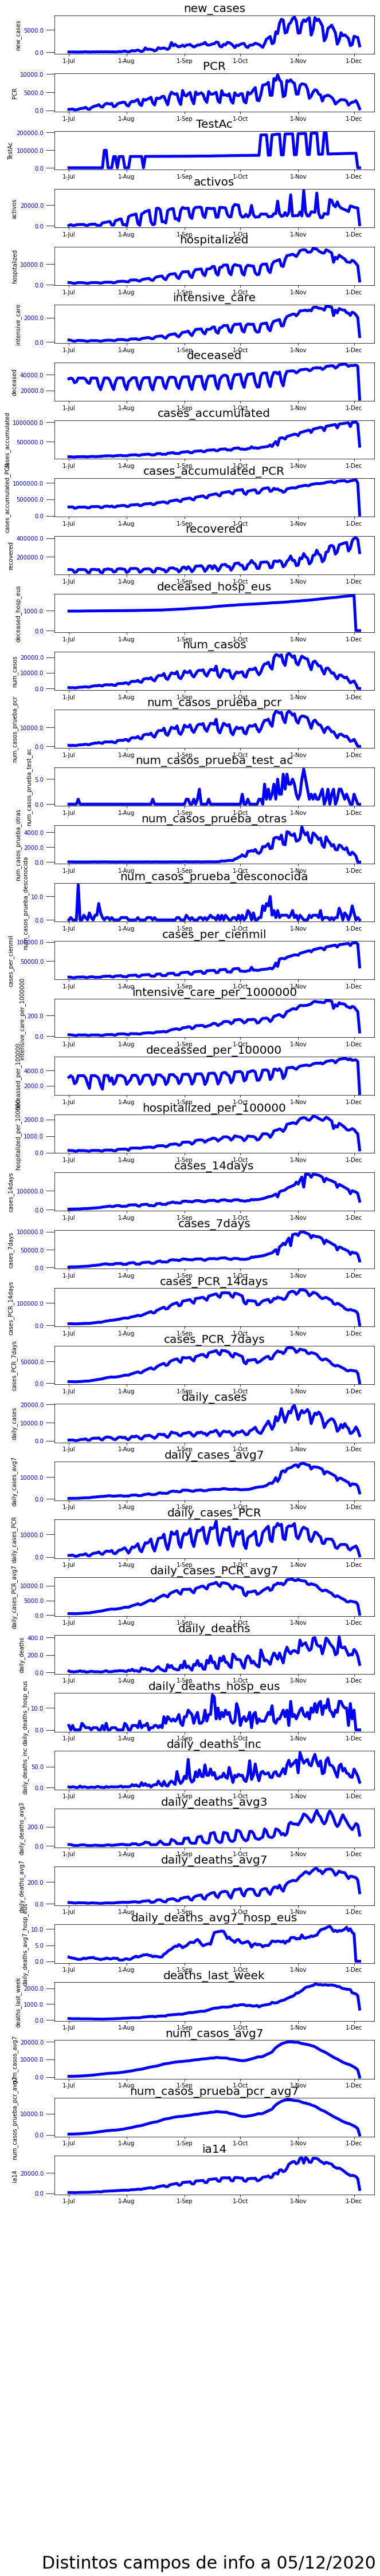

In [15]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [57]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
casos_nuevos_paisvasco = 'casos_nuevos_paisvasco'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
pais_vasco=['Bizkaia','Araba/Álava','Gipuzkoa']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in pais_vasco:
    datos.loc[datos['province']==provincia,casos_nuevos_paisvasco]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']   
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


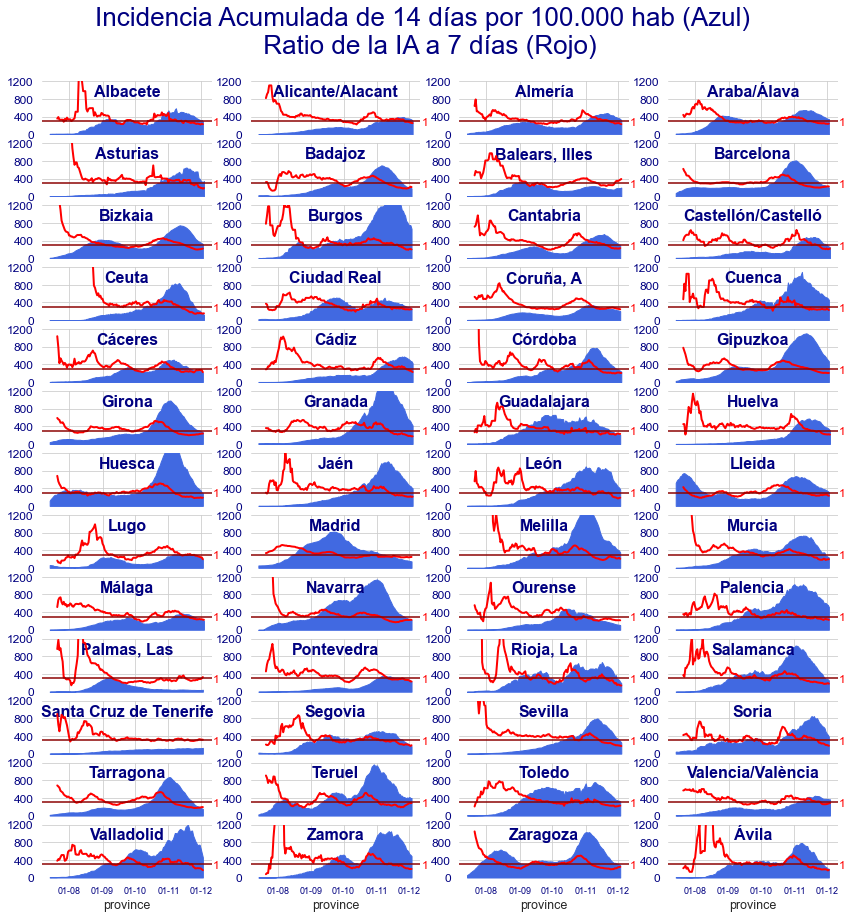

In [58]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1200)
    ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    ax1.grid(True)
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [59]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        ax1.set_ylim(0,1000)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1,15]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid pero con varias funcionaes para el segundo eje y
    clave_avg='daily_cases_PCR_avg7'
    clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    casos_nuevos='daily_cases'
    ventana_IA=14
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    datos_ = datos.fillna(0,axis=1)
    datos_ = datos_[(datos_['date']>=datetime(year=2020,month=3,day=1)) & (datos_['province'].isin(provincias))]

    for provincia in provincias:
        datos_.loc[datos_['province']==provincia,AI]=\
        datos_.loc[datos_['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
        /datos_.loc[datos_['province']==provincia,'poblacion']*100000

        serie=datos_.loc[datos_['province']==provincia,AI].pct_change(periods=7).add(1)
        datos_.loc[datos_['province']==provincia,clave_ratio]=serie    
    

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
    # Título
    #g.fig.set_figwidth(20)
    #g.fig.set_figheight(10)
    #g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
    #g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
    #       fontsize=24,color=color_titulos)

    #g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
    #           fontsize=24,horizontalalignment='left',color=color_titulos)


    XmajorFmt = DateFormatter('%d-%b')

    g.map(plt.fill_between, 'date',AI,color=color_diarios)

    ejes = g.axes

    for i,ax in enumerate(ejes):
        #ax.set_title('')
        ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
        ax.grid(False)
        lista_y = ax.get_yticks()
        ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
        ax.set_xlabel('')
        if i % columnas ==0:
            #ax.set_yticks([0,200,400,600,800])
            ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
            ax.yaxis.set_major_locator(plt.MaxNLocator(4))
            ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
        ax2 = ax.twinx()
        ax2.grid(True)
        ax2.set_yticks([0,1,2,3])
        ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
        ax2.set_ylim(0,5)
        ax2.fill_between(datos_['date'].unique(), datos_[datos_['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
        ax2.xaxis.set_major_formatter(XmajorFmt)
        ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.set_xlabel('')
        ax2.set_title('')
    
        if i % columnas == columnas-1:
        
            ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
            #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
            ax2.set_yticks([0,1,2,3])
            ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        #ax.set_title('')
        #ax.set_suptitle('')
        ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
    g.map(label,'province')


    axes = g.axes.flatten()
    for ax in axes:
        ax.set_xlabel("")
    #    ax.set_ylabel('')
    g.set_titles('')




    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=100)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

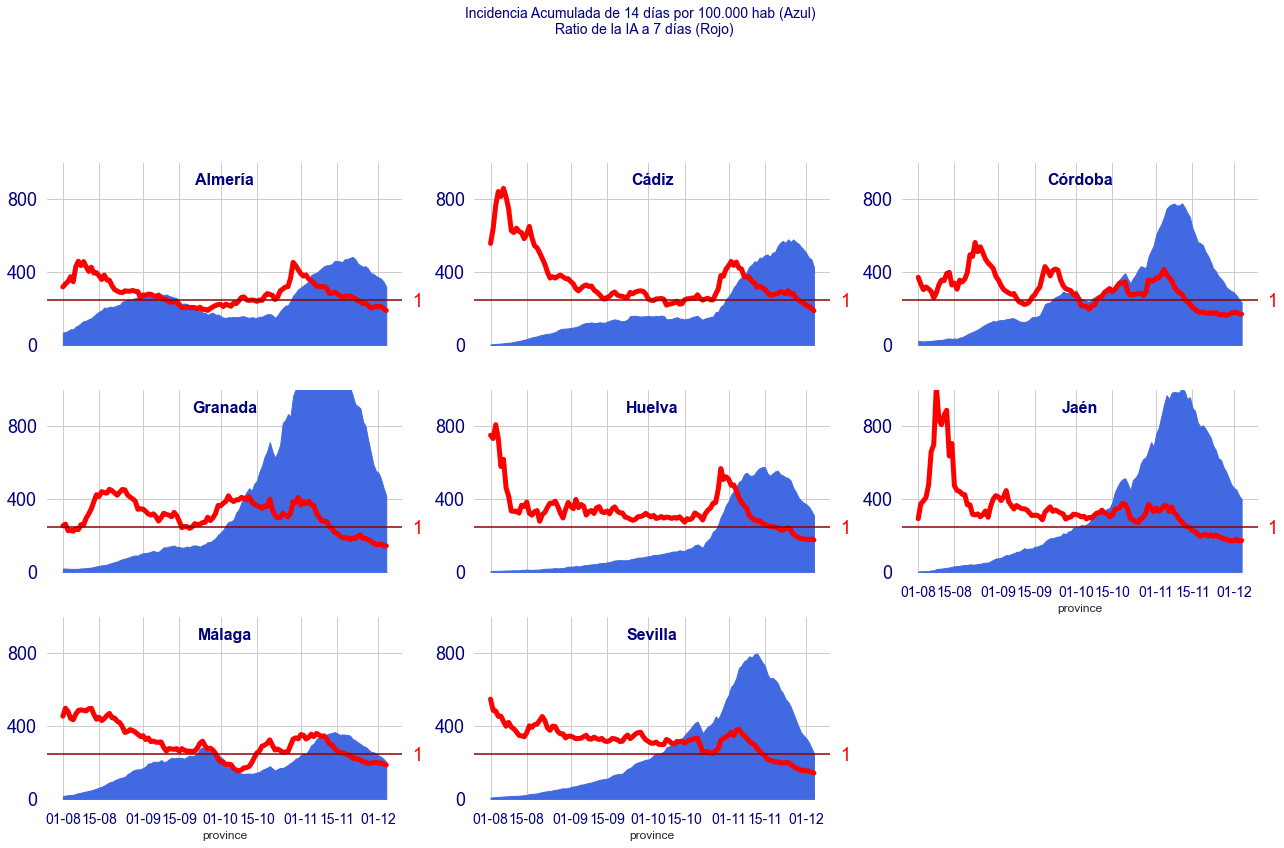

In [60]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

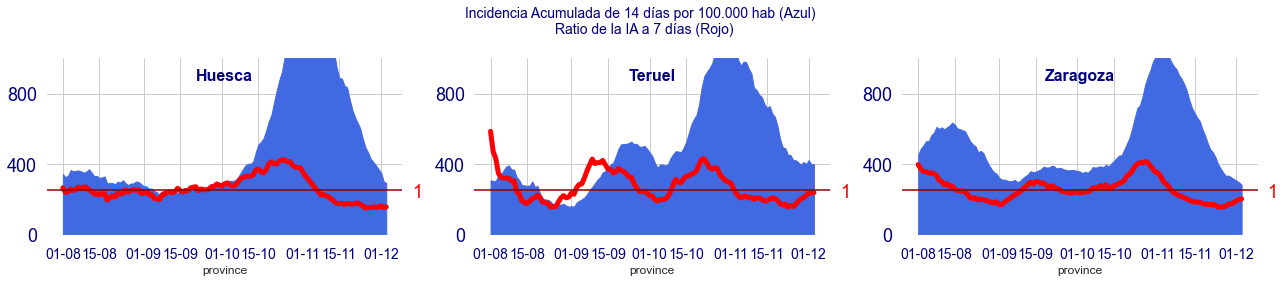

In [61]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

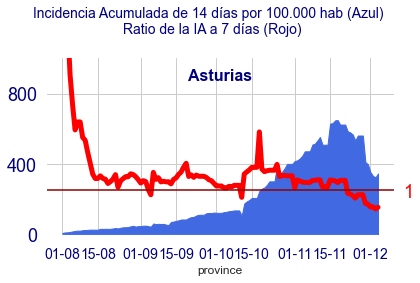

In [62]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

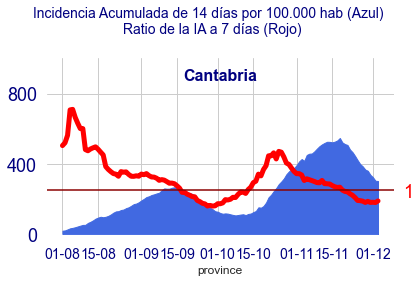

In [63]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

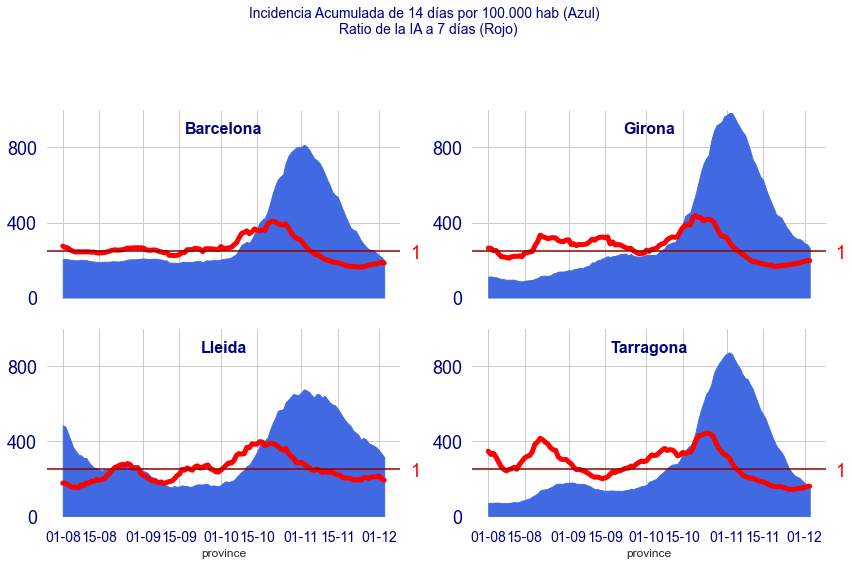

In [64]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

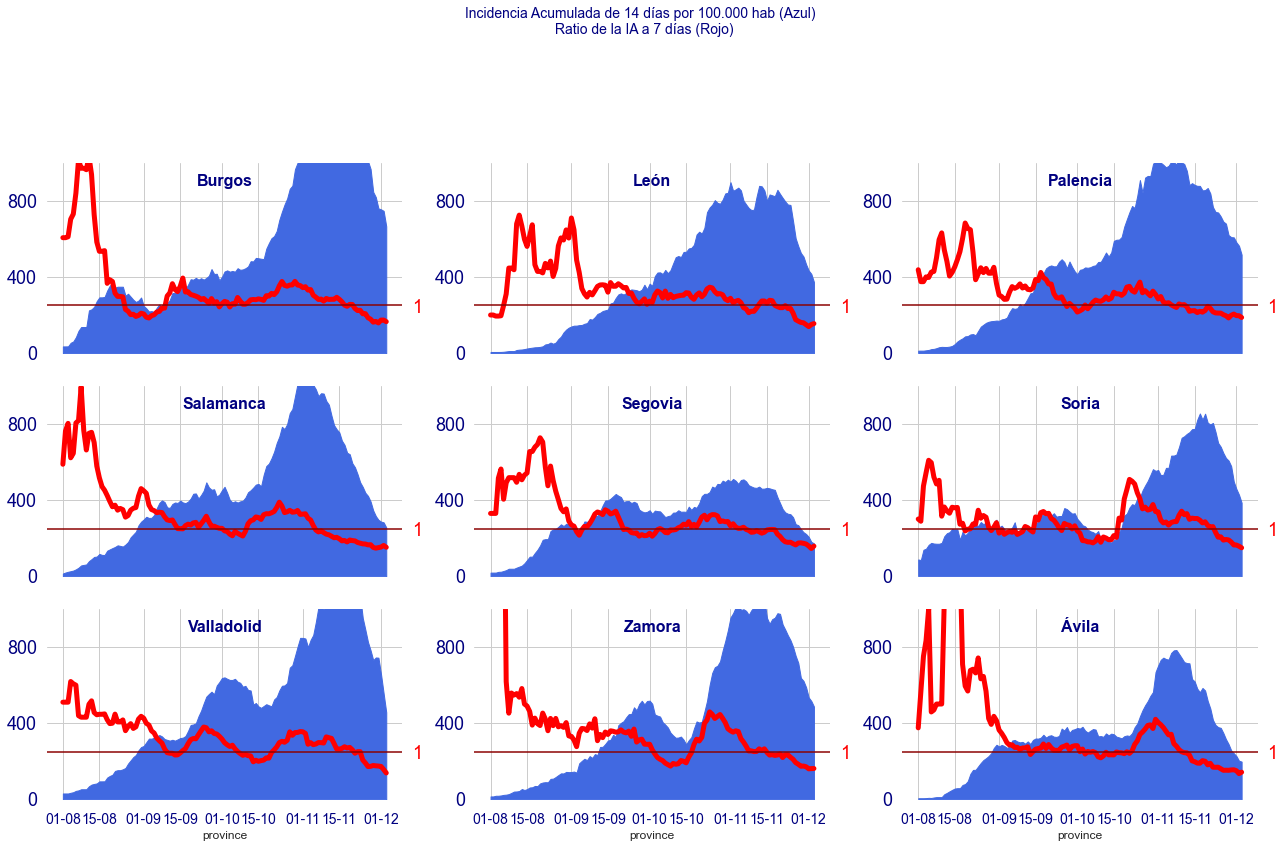

In [65]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

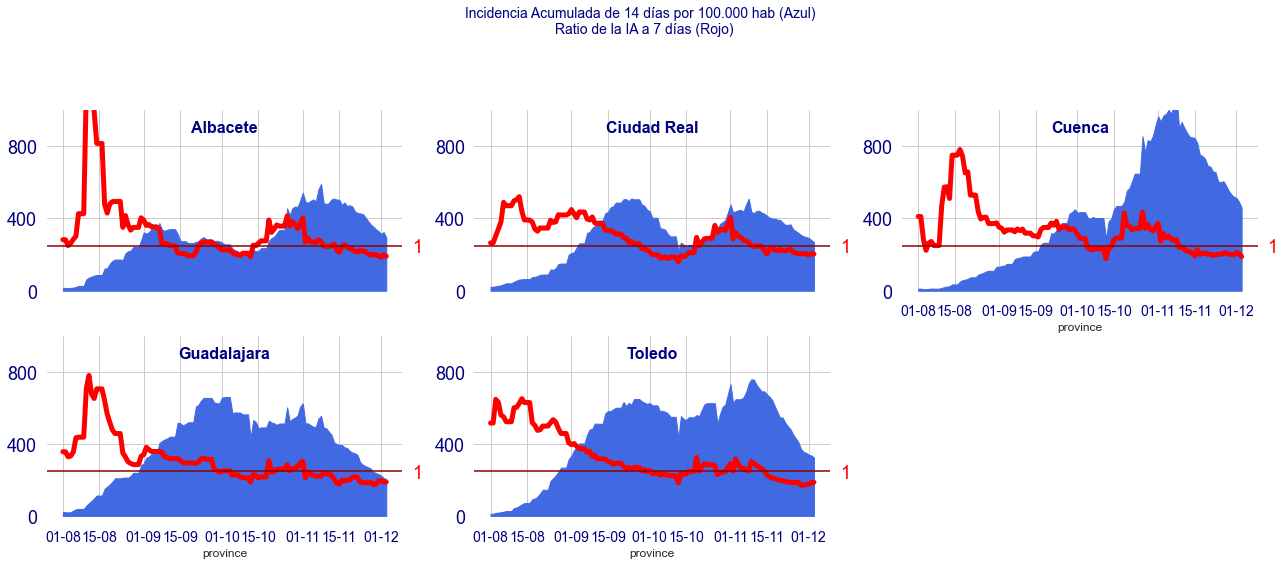

In [66]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

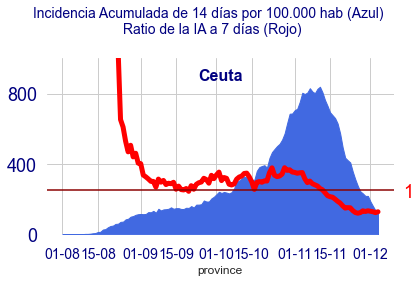

In [67]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

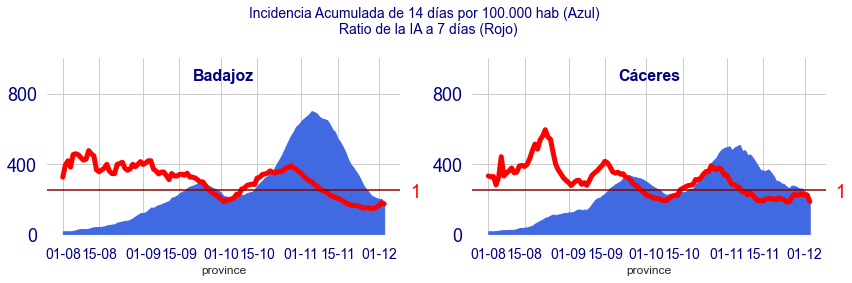

In [68]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

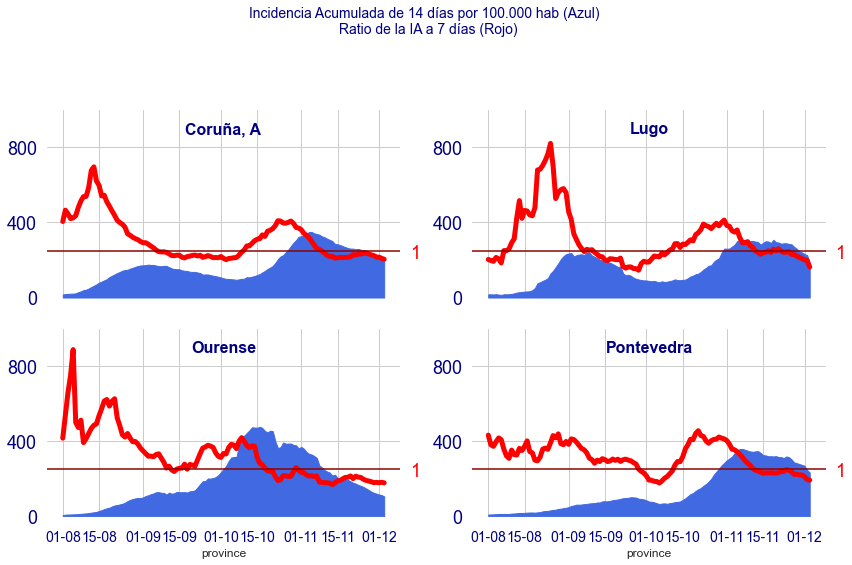

In [69]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

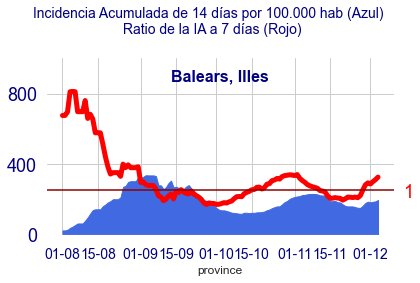

In [70]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

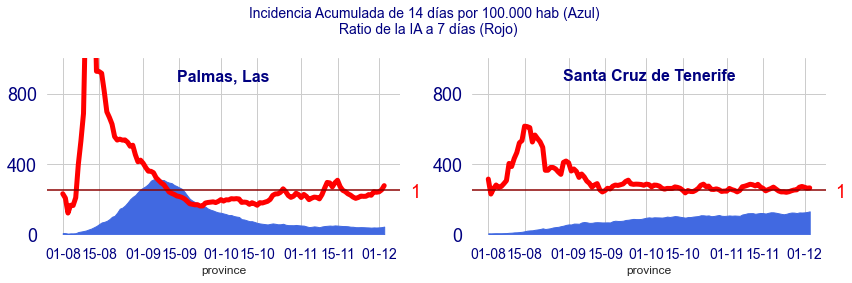

In [71]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

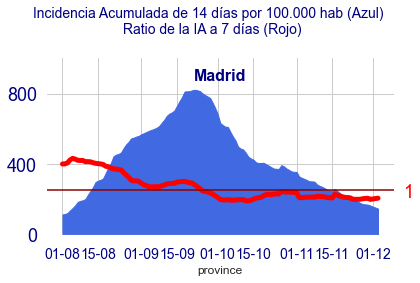

In [72]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

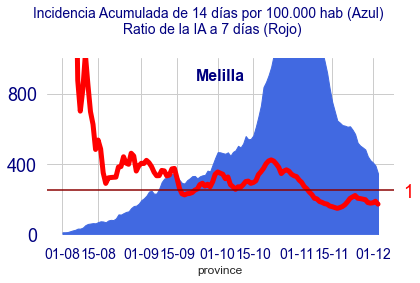

In [73]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

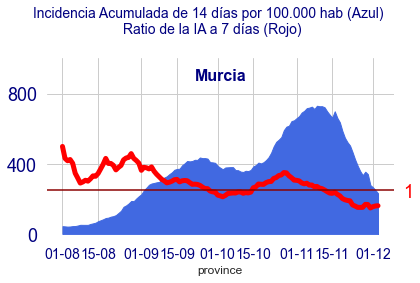

In [74]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

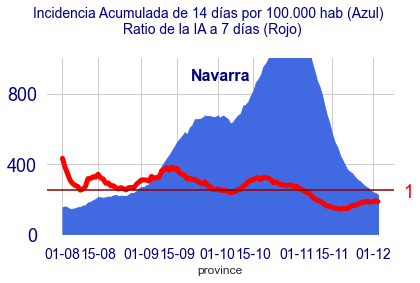

In [75]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

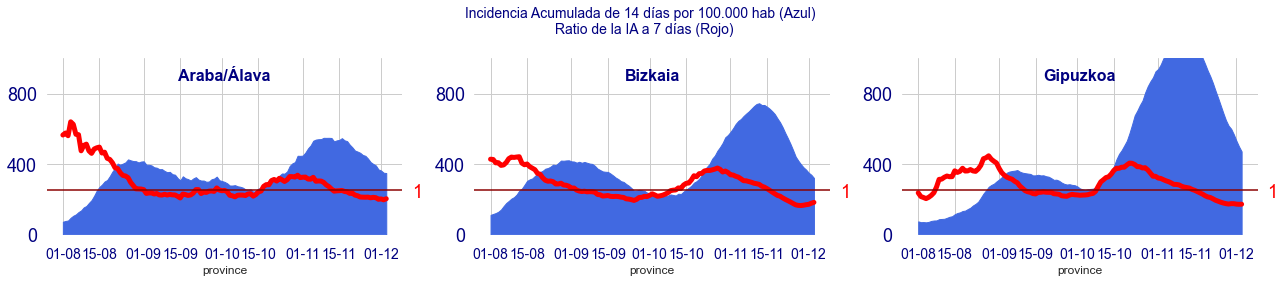

In [76]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

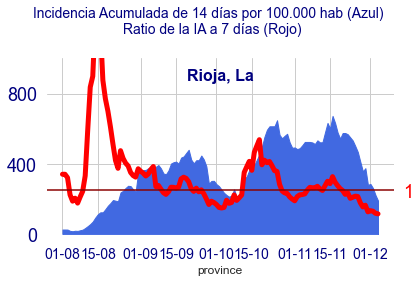

In [77]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

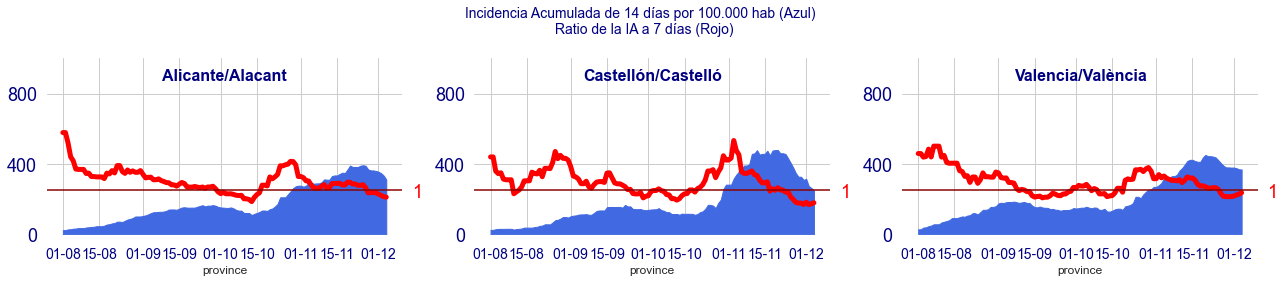

In [78]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [ ]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

In [ ]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

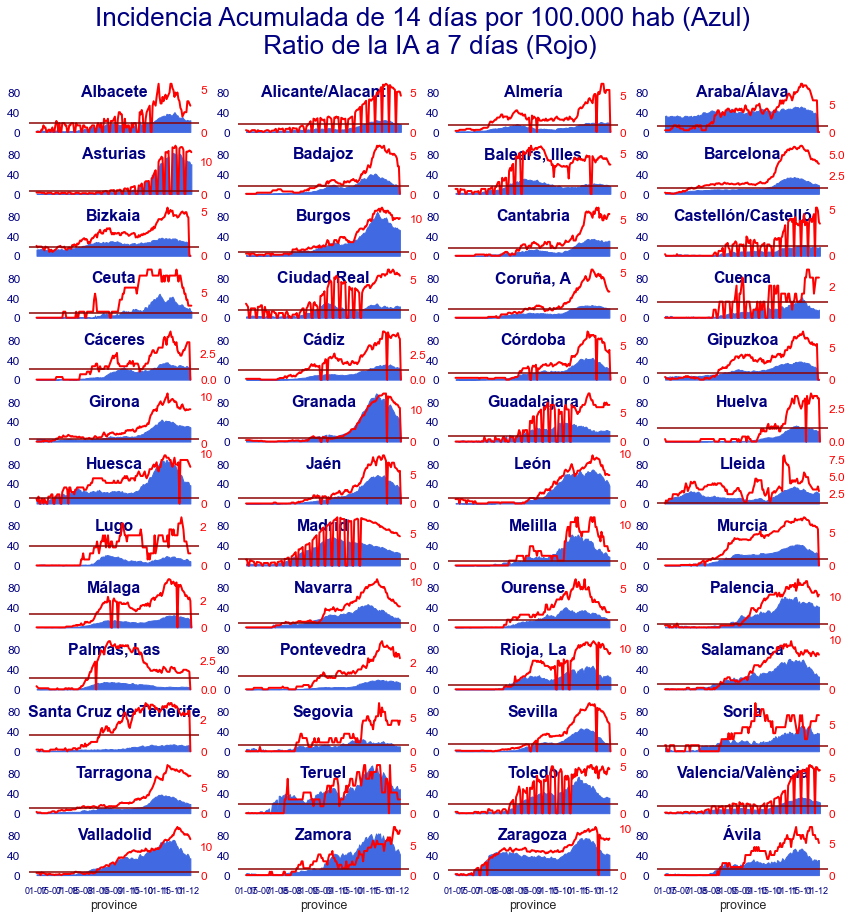

In [42]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [79]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (y_max)
    
    
    def grafica(x, color, label):
        
        
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 1080x1080 with 0 Axes>

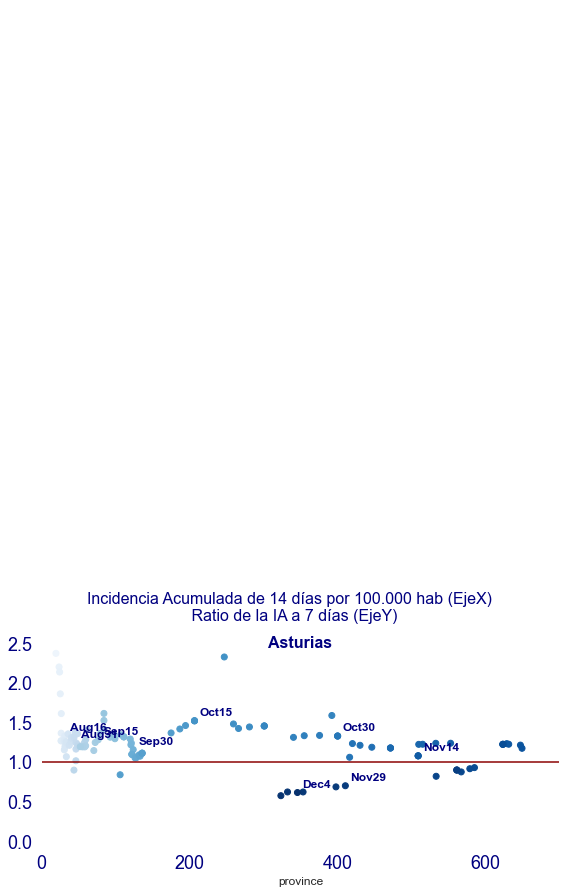

In [80]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

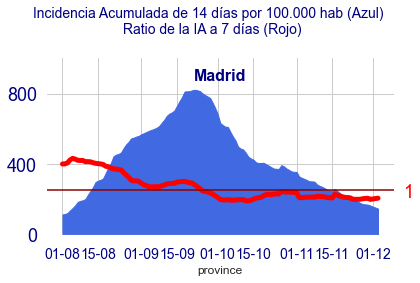

In [81]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

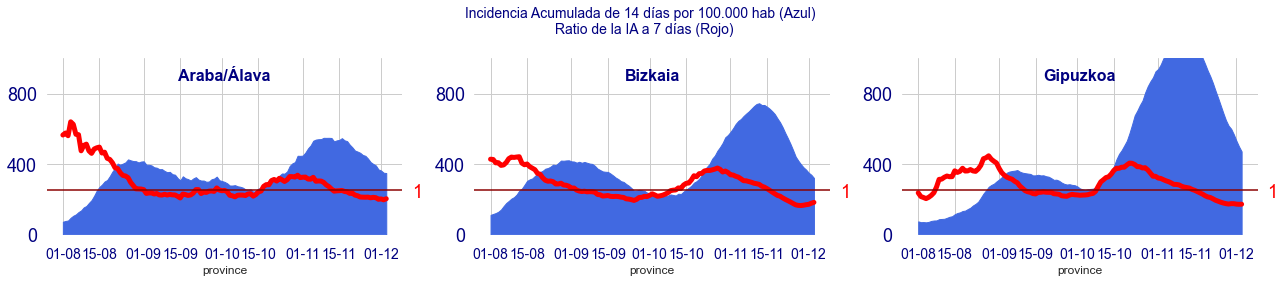

In [82]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

3.0


<Figure size 1080x1080 with 0 Axes>

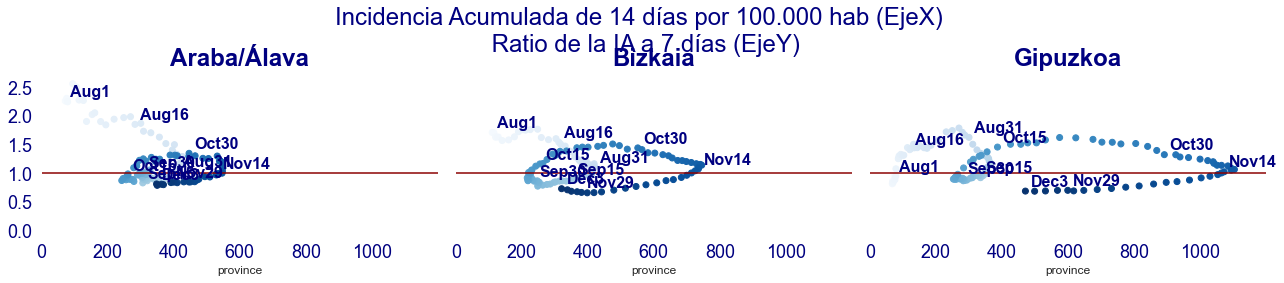

In [83]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

2.0


<Figure size 1080x1080 with 0 Axes>

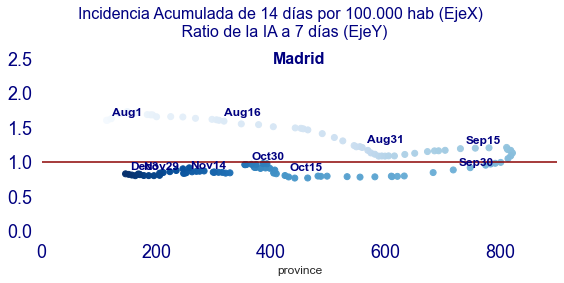

In [84]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

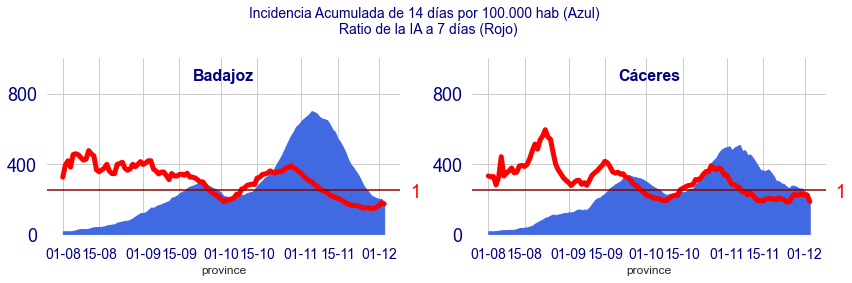

In [85]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2.5


<Figure size 1080x1080 with 0 Axes>

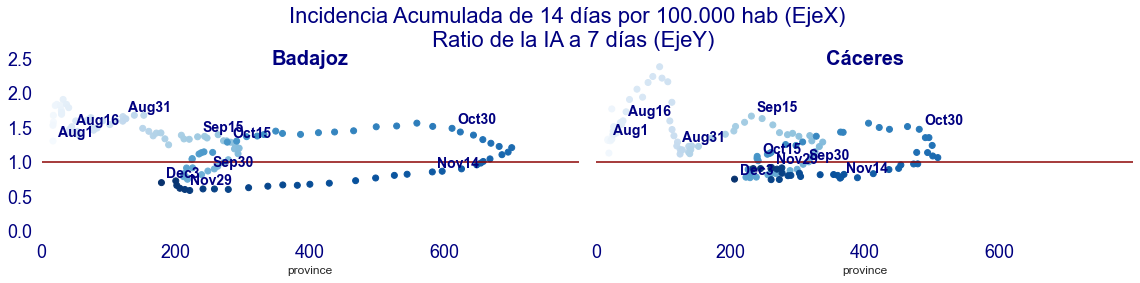

In [86]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

2.0


<Figure size 1080x1080 with 0 Axes>

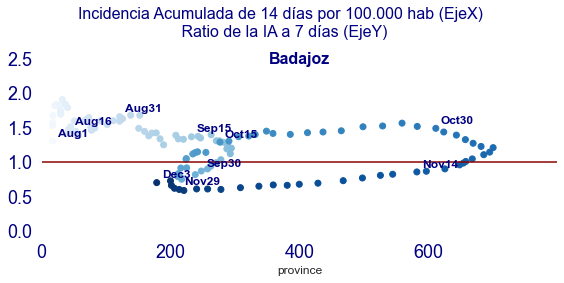

In [87]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

3.0


<Figure size 1080x1080 with 0 Axes>

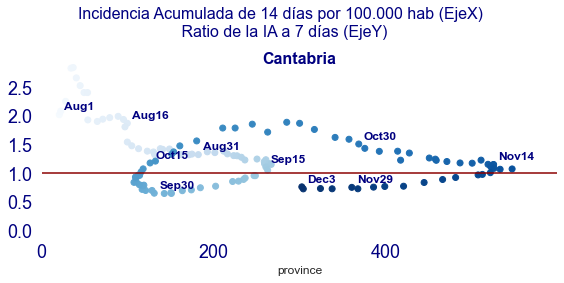

In [88]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [89]:
datos.loc[datos['province']=='Madrid']

date province  ine_code                  ccaa  new_cases  PCR  \
9494  2020-07-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9546  2020-07-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9598  2020-07-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9650  2020-07-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9702  2020-07-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9754  2020-07-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9806  2020-07-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9858  2020-07-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9910  2020-07-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9962  2020-07-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10014 2020-07-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10066 2020-07-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10118 2020-07-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10170 2020-07-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10222 2020-07-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10274 2020-07-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10326 2020-07-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10378 2020-07-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10430 2020-07-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10482 2020-07-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10534 2020-07-21   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10586 2020-07-22   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10638 2020-07-23   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10690 2020-07-24   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10742 2020-07-25   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10794 2020-07-26   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10846 2020-07-27   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10898 2020-07-28   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10950 2020-07-29   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11002 2020-07-30   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11054 2020-07-31   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11106 2020-08-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11158 2020-08-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11210 2020-08-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11262 2020-08-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11314 2020-08-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11366 2020-08-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11418 2020-08-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11470 2020-08-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11522 2020-08-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11574 2020-08-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11626 2020-08-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11678 2020-08-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11730 2020-08-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11782 2020-08-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11834 2020-08-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11886 2020-08-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11938 2020-08-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11990 2020-08-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12042 2020-08-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12094 2020-08-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12146 20

2.0


<Figure size 1080x1080 with 0 Axes>

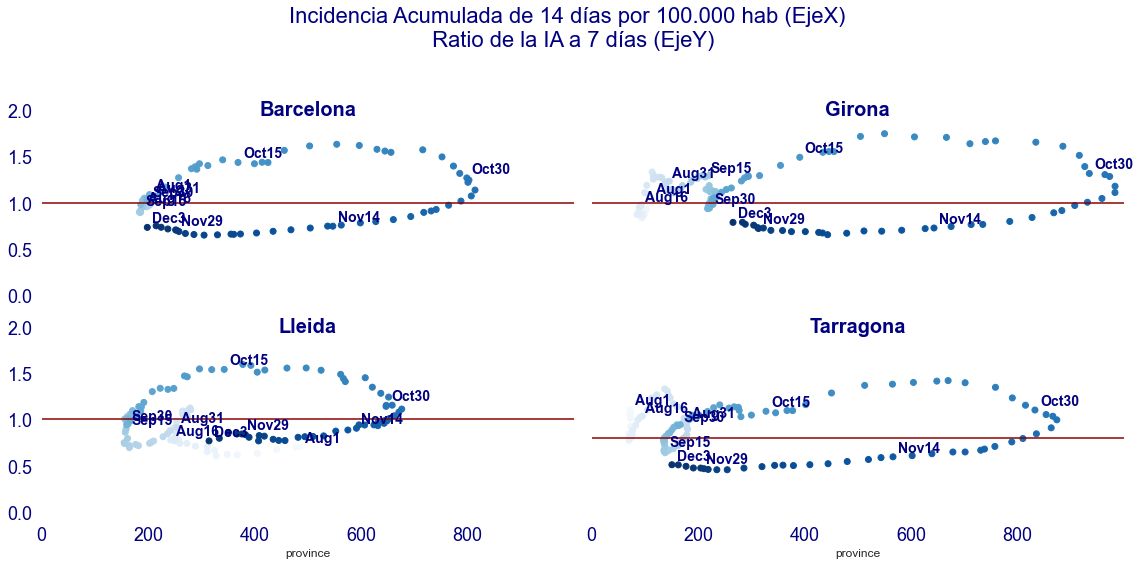

In [90]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 1080x1080 with 0 Axes>

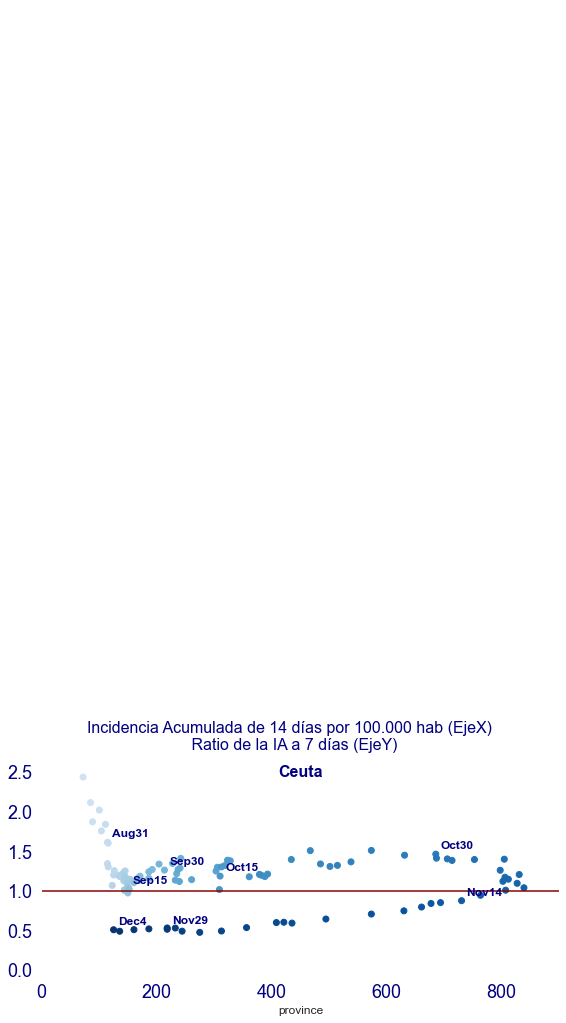

In [91]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

2


<Figure size 1080x1080 with 0 Axes>

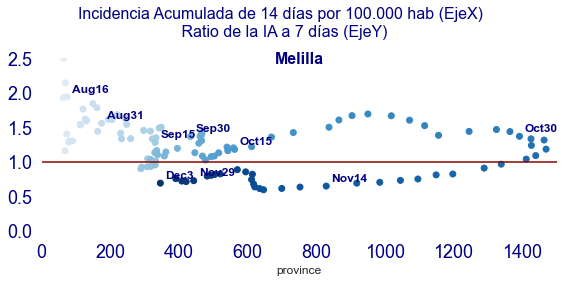

In [92]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

2.0


<Figure size 1080x1080 with 0 Axes>

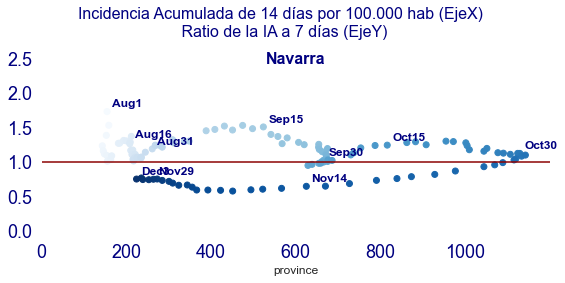

In [93]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

2


<Figure size 1080x1080 with 0 Axes>

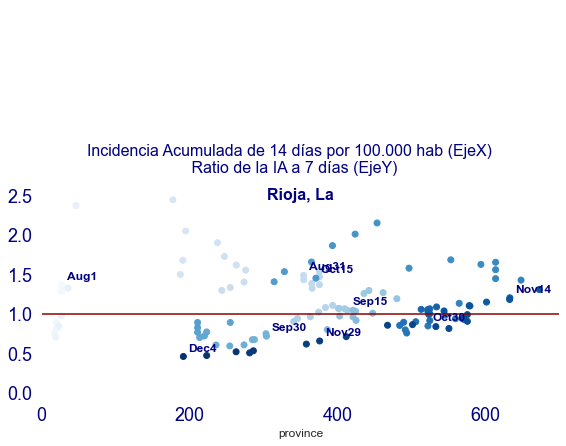

In [94]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

2.5


<Figure size 1080x1080 with 0 Axes>

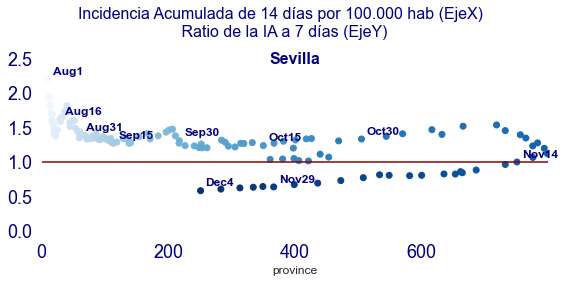

In [95]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

2


<Figure size 1080x1080 with 0 Axes>

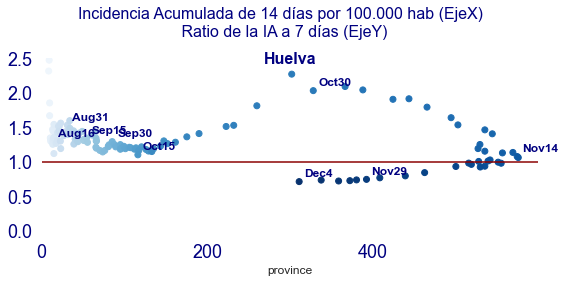

In [96]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

2.5


<Figure size 1080x1080 with 0 Axes>

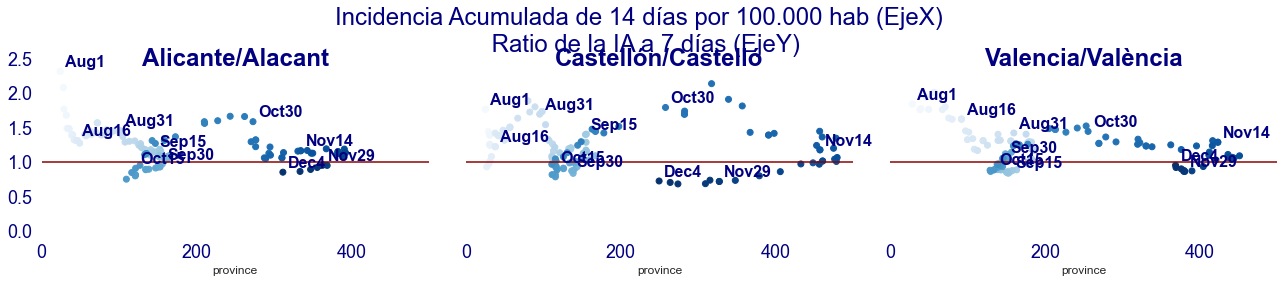

In [97]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

2


<Figure size 1080x1080 with 0 Axes>

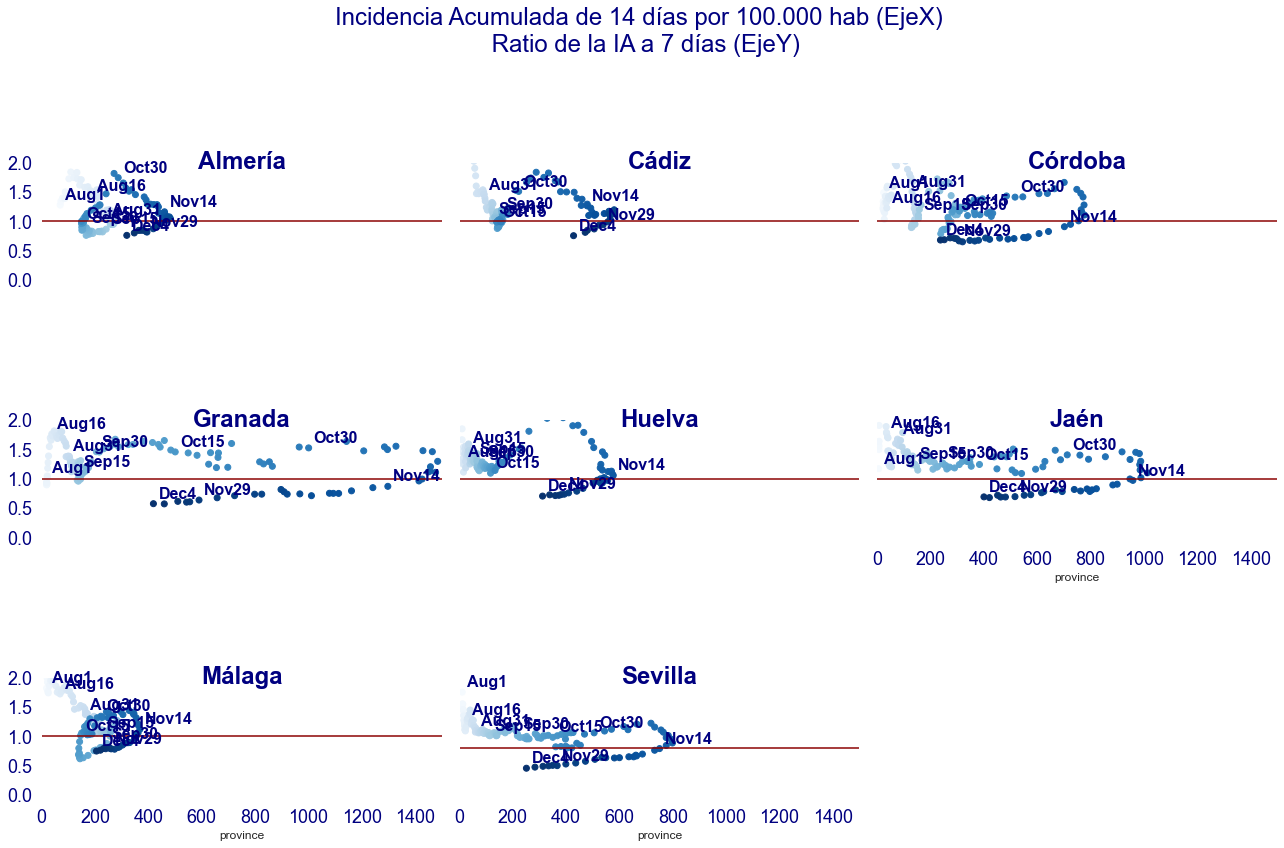

In [98]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')